In [ ]:
# French adaptation of https://medium.com/@noa.kel/wordle-what-is-statistically-the-best-word-to-start-the-game-with-a05e6a330c13

In [1]:
%pip install nltk

     |████████████████████████████████| 1.5 MB 58 kB/s             
     |████████████████████████████████| 763 kB 78 kB/s            
Note: you may need to restart the kernel to use updated packages.


In [3]:
!wget -L https://www.freelang.com/download/misc/liste_francais.zip
!unzip liste_francais.zip

--2022-02-09 10:20:36--  https://www.freelang.com/download/misc/liste_francais.zip
Resolving www.freelang.com (www.freelang.com)... 184.154.46.75
Connecting to www.freelang.com (www.freelang.com)|184.154.46.75|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 69378 (68K) [application/zip]
Saving to: ‘liste_francais.zip’

liste_francais.zip  100%[===================>]  67.75K   106KB/s    in 0.6s    

2022-02-09 10:20:38 (106 KB/s) - ‘liste_francais.zip’ saved [69378/69378]

Archive:  liste_francais.zip
  inflating: liste_francais.txt      


In [17]:
with open("liste_francais.txt","r", encoding = "ISO-8859-1") as file :
    liste_mots_5lettres=[mot.strip() for mot in file.readlines() if len(mot.strip())==5 and mot[0].islower() ]

In [105]:
normalMap = {'À': 'A', 'Á': 'A', 'Â': 'A', 'Ã': 'A', 'Ä': 'A',
             'à': 'a', 'á': 'a', 'â': 'a', 'ã': 'a', 'ä': 'a', 'ª': 'A',
             'È': 'E', 'É': 'E', 'Ê': 'E', 'Ë': 'E',
             'è': 'e', 'é': 'e', 'ê': 'e', 'ë': 'e',
             'Í': 'I', 'Ì': 'I', 'Î': 'I', 'Ï': 'I',
             'í': 'i', 'ì': 'i', 'î': 'i', 'ï': 'i',
             'Ò': 'O', 'Ó': 'O', 'Ô': 'O', 'Õ': 'O', 'Ö': 'O',
             'ò': 'o', 'ó': 'o', 'ô': 'o', 'õ': 'o', 'ö': 'o', 'º': 'O',
             'Ù': 'U', 'Ú': 'U', 'Û': 'U', 'Ü': 'U',
             'ù': 'u', 'ú': 'u', 'û': 'u', 'ü': 'u',
             'Ñ': 'N', 'ñ': 'n',
             'Ç': 'C', 'ç': 'c',
             '§': 'S',  '³': '3', '²': '2', '¹': '1',
             '\x9c':'oe','œ':'oe', 'Œ':'OE'}
normalize = str.maketrans(normalMap)
vocab_liste_mots_5lettres_normalisee=sorted(set(map(lambda x:   x.translate(normalize) ,liste_mots_5lettres)))

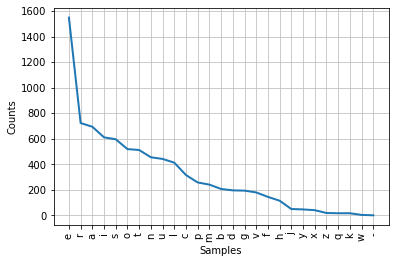

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [111]:
from nltk.probability import FreqDist
fd=FreqDist(" ".join(vocab_liste_mots_5lettres_normalisee))
fd.pop(" ")
fd.plot()

In [113]:
[mot for mot in  vocab_liste_mots_5lettres_normalisee if set("raise")==set(mot)]

['aires', 'serai']